In [2]:
import tensorly as tl
import numpy as np
import torch as t
import matplotlib.pyplot as plt

In [ ]:
tl.set_backend('pytorch') 

In [67]:
W = t.randn([100, 50])
V = t.randn([100, 50])
P = t.randn([100, 50])

X = t.einsum("ia,ja,ka->ijk", W, V, P) + t.einsum("ia,ja,ka->ijk", V, W, P)
X = X.to("cuda")

In [68]:
t.allclose(X, X.permute(1, 0, 2))

True

In [63]:

tl.set_backend('pytorch')
fac = tl.decomposition.CP(101, init='random')
X_CP = fac.fit_transform(X.to("cuda"))

In [97]:
X = X.to("cuda")

fac = tl.decomposition.CP(50, init='random', normalize_factors=False, tol=1e-15, linesearch=True)
X_CP = fac.fit_transform(X)

D, (A, B, C) = X_CP

Xp = t.einsum("a,ia,ja,ka->ijk", D, A, B, C)
x = X / X.norm()
xp = Xp / Xp.norm()
(x - xp).norm(), x.flatten() @ xp.flatten()

(tensor(0.6537, device='cuda:0'), tensor(0.7863, device='cuda:0'))

In [98]:
(X - Xp).norm() / X.norm()

tensor(0.6178, device='cuda:0')

In [86]:
nA, nB, nC = A.norm(dim=0), B.norm(dim=0), C.norm(dim=0)
D = nA * nB * nC
a, b, c = A / nA, B / nB, C / nC

In [87]:
np.sort(D.cpu())

array([1100.5691, 1166.0458, 1206.847 , 1276.6555, 1286.6979, 1315.3813,
       1329.8646, 1330.4255, 1411.0144, 1486.1462], dtype=float32)

In [37]:
XpD = t.einsum("ia,ja,ka,a->ijk", a, b, c, D)
xpD = XpD / XpD.norm()
(xp - xpD).norm() / xp.norm(), xpD.flatten() @ xp.flatten()

(tensor(1.3313e-07), tensor(1.0000))

In [10]:
(A.T @ A).diag()

tensor([493507.2812, 461448.3125, 599888.8125, 403647.9375, 429537.6562,
        286080.6875, 203970.0312, 284473.5312, 209094.1094, 337578.9062])

In [109]:
m = A @ A.T
m.diag().norm()/ m.norm()

tensor(0.5335)

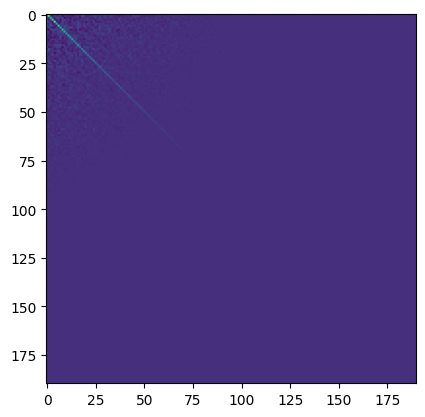

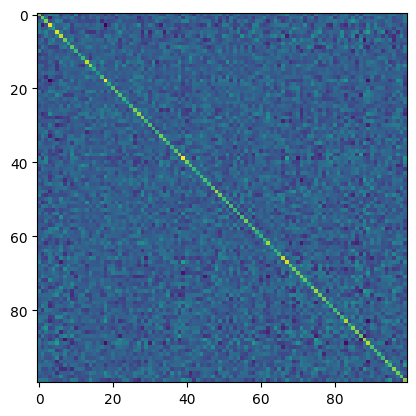

In [105]:
m = A.T @ A
plt.imshow(A.T @ A)
plt.show()
plt.imshow(A @ A.T)
plt.show()


In [99]:
X_CP = tl.decomposition.CP(190).fit_transform(X)

A, B, C = X_CP.factors

Xp = t.einsum("ia,ja,ka->ijk", A, B, C)
x = X / X.norm()
xp = Xp / Xp.norm()
(x - xp).norm(), x.flatten() @ xp.flatten()

(tensor(0.1653), tensor(0.9864))

In [51]:
a = A / A.norm()
b = B / B.norm()
c = C / C.norm()

In [52]:
(a + b).norm()

tensor(1.3998)

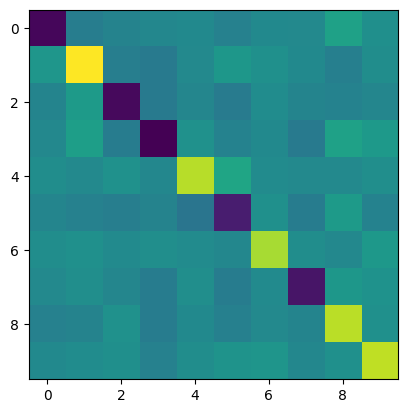

In [56]:
plt.imshow(a.T @ b)

tensor([[ 1.0000, -0.1154,  0.0796,  0.0451, -0.0205,  0.1079, -0.0255,  0.0323,
          0.2189,  0.0304],
        [-0.0909,  1.0000,  0.1172,  0.1581, -0.0317, -0.1124,  0.0436,  0.0198,
         -0.1281,  0.0147],
        [ 0.0655,  0.1211,  1.0000,  0.1499, -0.0569,  0.1664,  0.0106,  0.0750,
         -0.0963, -0.0574],
        [ 0.0329,  0.1490,  0.1368,  1.0000,  0.0530,  0.0995, -0.0225,  0.1655,
          0.2190,  0.1336],
        [-0.0135, -0.0259, -0.0451,  0.0460,  1.0000, -0.2555, -0.0050,  0.0289,
         -0.0324,  0.0273],
        [ 0.0639, -0.0820,  0.1191,  0.0773, -0.2300,  1.0000,  0.0512,  0.1497,
          0.1527, -0.0918],
        [-0.0153,  0.0332,  0.0077, -0.0182, -0.0045,  0.0523,  1.0000, -0.0202,
         -0.0444,  0.1192],
        [ 0.0244,  0.0174,  0.0541,  0.1334,  0.0225,  0.1585, -0.0177,  1.0000,
          0.1083,  0.0616],
        [ 0.0945, -0.0708, -0.0511,  0.1282, -0.0219,  0.1153, -0.0321,  0.0738,
          1.0000,  0.0410],
        [ 0.0151,  

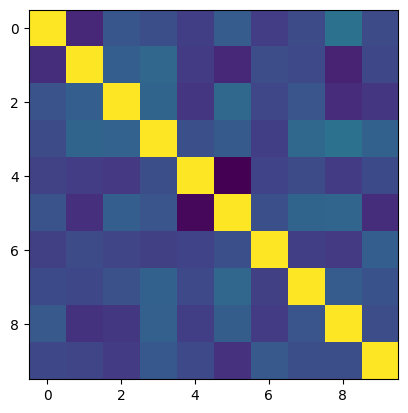

In [69]:
m = a.T @ b
n = m / m.diag()
plt.imshow(n)
n